<a href="https://colab.research.google.com/github/ChacoGolden/Stat-Data-Science/blob/main/Panel_reg_heter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression analysis

In [2]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
from linearmodels.panel import PanelOLS
from statsmodels.tools import add_constant

In [4]:
# Load the CSV file
data = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Panel_Data_Inc_Edu_Infl_Wm_Hh_Age_Urb.csv')
data = data.drop(['Education', 'Inflation', 'Women', 'Household', 'Age', 'Urban'], axis=1)
# Convert 'Waste' from tons to kilograms
data['Waste'] = data['Waste'] * 1000

#Add data for heterogeneity
url = "https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Environment_awareness_long.csv"  # Remplacer par l'URL de votre fichier CSV sur GitHub
env_awareness_data = pd.read_csv(url)
data = pd.merge(data, env_awareness_data[['Country', 'Year', 'Env Awareness']], on=['Country', 'Year'], how='left')# Inspect the first few rows of the data
data

,Country,Year,Waste,Income,Env Awareness
0,Belgium,2014,484672.171322,21705.0,0.95
1,Bulgaria,2014,376962.938849,3311.0,0.94
2,Czechia,2014,310164.577725,7622.0,0.93
3,Denmark,2014,636289.225526,27861.0,0.96
4,Germany,2014,456714.035948,19733.0,0.94
...,...,...,...,...,...
229,Slovakia,2022,477938.297374,8819.0,NaN
230,Finland,2022,301988.143630,26541.0,NaN
231,Sweden,2022,410815.831806,26738.0,NaN
232,Norway,2022,412204.000907,39206.0,NaN


In [5]:
# Convert 'Country' and 'Year' to categorical variables (if not already)
data['Country'] = data['Country'].astype('category')
data['Year'] = data['Year'].astype('category')

# Check for missing values
print(data.isnull().sum())
data = data[data['Country'] != 'Türkiye']
print(data.head())
num_countries = data['Country'].nunique()
print(f"Number of different countries: {num_countries}")
print(data.isnull().sum())

Country            0
Year               0
Waste              0
Income             0
Env Awareness    162
dtype: int64
    Country  Year          Waste   Income  Env Awareness
0   Belgium  2014  484672.171322  21705.0           0.95
1  Bulgaria  2014  376962.938849   3311.0           0.94
2   Czechia  2014  310164.577725   7622.0           0.93
3   Denmark  2014  636289.225526  27861.0           0.96
4   Germany  2014  456714.035948  19733.0           0.94
Number of different countries: 25
Country            0
Year               0
Waste              0
Income             0
Env Awareness    153
dtype: int64


Il manque les data pour l'âge moyen en Turquie

In [6]:
data['Year'] = data['Year'].astype(int)  # Or float if years are not integers

<ipython-input-6-a91a8917f5c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Year'].astype(int)  # Or float if years are not integers


In [7]:
# Set 'Country' and 'Year' as index to create a MultiIndex
data = data.set_index(['Country', 'Year'])

In [8]:
# Define the dependent variable (Y) and independent variables (X)
Y = data['Waste']
X = data[['Income', 'Env Awareness']]

# Add a constant term to the independent variables
X = add_constant(X)

In [9]:
# Run the fixed effects model
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='robust')

# Display the results
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Waste   R-squared:                        0.0355
Estimator:                   PanelOLS   R-squared (Between):             -0.8298
No. Observations:                  72   R-squared (Within):              -0.2581
Date:                Wed, Dec 11 2024   R-squared (Overall):             -0.7180
Time:                        09:44:15   Log-likelihood                   -856.07
Cov. Estimator:                Robust                                           
                                        F-statistic:                      0.8086
Entities:                          24   P-value                           0.4520
Avg Obs:                       3.0000   Distribution:                    F(2,44)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1.4461
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/l

In [10]:
# Create the interaction term
data['Income_Awareness'] = data['Income'] * data['Env Awareness']

In [11]:
# Define the dependent variable (Y) and independent variables (X)
Y = data['Waste']
X = data[['Income', 'Env Awareness', 'Income_Awareness']]

# Add a constant term to the independent variables
X = add_constant(X)

# Run the fixed effects model with interaction term
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='robust')

# Display the results
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Waste   R-squared:                        0.0491
Estimator:                   PanelOLS   R-squared (Between):             -0.8002
No. Observations:                  72   R-squared (Within):              -0.2688
Date:                Wed, Dec 11 2024   R-squared (Overall):             -0.6963
Time:                        09:44:20   Log-likelihood                   -855.56
Cov. Estimator:                Robust                                           
                                        F-statistic:                      0.7406
Entities:                          24   P-value                           0.5337
Avg Obs:                       3.0000   Distribution:                    F(3,43)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1.0312
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/l

The interaction is negative and significant, meaning the relationship between Income and Waste weakens as Education increases.

In [12]:
import numpy as np

# Transform 'Income' to its logarithm
data['Log_Income'] = np.log(data['Income'])


In [13]:
# Update the interaction term to reflect the log transformation
data['Log_Income_Awareness'] = data['Log_Income'] * data['Env Awareness']
X['Log_Income_Awareness'] = data['Log_Income_Awareness']

# Define the dependent variable (Y) and independent variables (X)
Y = data['Waste']
X = data[['Log_Income', 'Log_Income_Awareness', 'Env Awareness', 'Income_Awareness']]



# Add a constant term to the independent variables
X = add_constant(X)

# Run the fixed effects model
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='robust')

# Display the results
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:                  Waste   R-squared:                        0.1540
Estimator:                   PanelOLS   R-squared (Between):              0.0418
No. Observations:                  72   R-squared (Within):               0.0724
Date:                Wed, Dec 11 2024   R-squared (Overall):              0.0478
Time:                        09:44:25   Log-likelihood                   -851.35
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1.9118
Entities:                          24   P-value                           0.1263
Avg Obs:                       3.0000   Distribution:                    F(4,42)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1.2732
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/usr/local/l

In [14]:
!pip install statsmodels

In [15]:
import statsmodels.api as sm # Import statsmodels and alias it as sm

def variance_inflation_factor(exog, exog_idx):
    """
    Calculate the variance inflation factor (VIF) for a given exogenous variable.

    Parameters:
    exog (np.ndarray): The exogenous data matrix.
    exog_idx (int): The index of the exogenous variable to calculate VIF for.

    Returns:
    float: The VIF value.
    """
    # Extract the variable of interest and the remaining variables
    x_i = exog[:, exog_idx]
    x_not_i = np.delete(exog, exog_idx, axis=1)
    model = sm.OLS(x_i, x_not_i).fit()
    r_squared_i = model.rsquared
    vif = 1 / (1 - r_squared_i)
    print(f"VIF for {X.columns[exog_idx]}: {vif}")  # Afficher le VIF pour chaque variable
    return vif

# Assuming 'data' is your DataFrame containing 'Env Awareness', 'Log_Income', 'Log_Income_Awareness'
X = data[['Income', 'Waste','Env Awareness']]
# Drop rows with missing or infinite values before adding a constant
X = X.replace([np.inf, -np.inf], np.nan).dropna()
X = sm.add_constant(X)  # Add a constant term (required for VIF calculation)

# Calculate VIF for each variable in X (excluding the constant)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns[1:] # Exclude the constant term from the variable names
# Calcul et attribution des valeurs VIF :
vif_values = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif_data["VIF"] = vif_values # Attribuer les valeurs VIF à la colonne "VIF"


print(vif_data)


VIF for Income: 1.2841254729165297
VIF for Waste: 1.2449875164438022
VIF for Env Awareness: 1.1368075073395714
        Variable       VIF
0         Income  1.284125
1          Waste  1.244988
2  Env Awareness  1.136808


# Heterogeneity

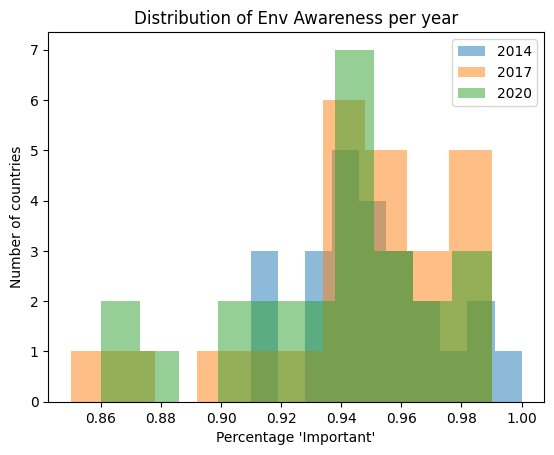

In [21]:
#Choix du threshold

import matplotlib.pyplot as plt

# Filtrer les données pour chaque année
data_2014 = env_awareness_data[env_awareness_data['Year'] == 2014]['Env Awareness']
data_2017 = env_awareness_data[env_awareness_data['Year'] == 2017]['Env Awareness']
data_2020 = env_awareness_data[env_awareness_data['Year'] == 2020]['Env Awareness']

plt.hist(data_2014, bins=10, alpha=0.5, label='2014')
plt.hist(data_2017, bins=10, alpha=0.5, label='2017')
plt.hist(data_2020, bins=10, alpha=0.5, label='2020')

plt.xlabel("Percentage 'Important'")
plt.ylabel("Number of countries")
plt.title("Distribution of Env Awareness per year")
plt.legend(loc='upper right')
plt.show()

In [35]:
#on choisit la médiane car distribution relativement symétrique et sans valeur extrême notable
# Extraire la colonne 'Env Awareness'
env_awareness_values = env_awareness_data['Env Awareness']

# Calculer la médiane
median_env_awareness = env_awareness_values.median()

# Afficher la médiane
print(f"La médiane de 'Env Awareness' pour toutes les années est : {median_env_awareness}")

La médiane de 'Env Awareness' pour toutes les années est : 0.95


In [37]:
# Inspecter les premières lignes pour comprendre la structure des données
print(env_awareness_data.head())

    Country  Year  Env Awareness  Env Awareness Dummy
0   Belgium  2014           0.95                    0
1  Bulgaria  2014           0.94                    0
2   Czechia  2014           0.93                    0
3   Denmark  2014           0.96                    1
4   Germany  2014           0.94                    0


In [38]:
# Définir le seuil
threshold = 0.95

# Créer la variable dummy
env_awareness_data['Env Awareness Dummy'] = (env_awareness_data['Env Awareness'] > threshold).astype(int)

In [39]:
# Fusionner les DataFrames en utilisant 'Country' et 'Year' comme clés
data = pd.merge(data, env_awareness_data[['Country', 'Year', 'Env Awareness Dummy']], on=['Country', 'Year'], how='left')

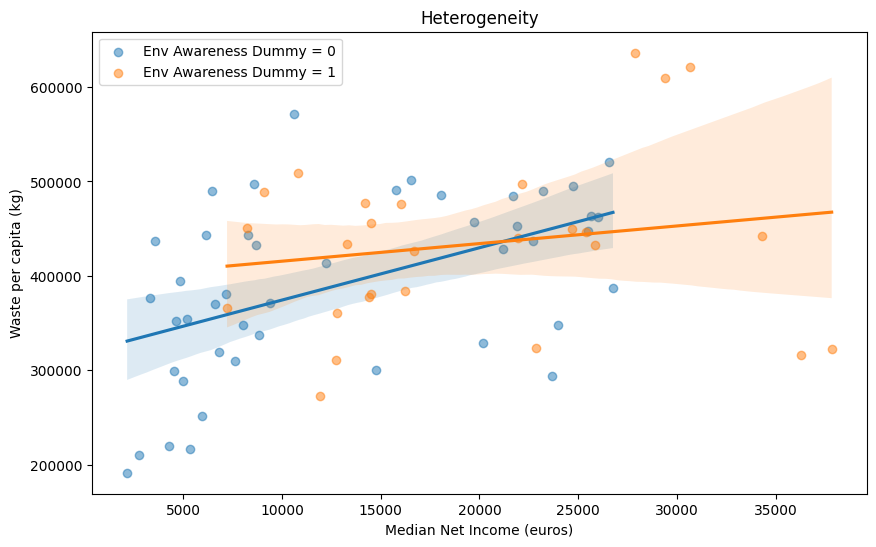

   Env Awareness Dummy      Intercept  Income Coefficient  P-value (Income)  \
0                    0  319095.320603            5.535774          0.000494   
1                    1  396944.149780            1.864570          0.372119   

   R-squared  
0   0.248367  
1   0.031982  

Analyse de l'hétérogénéité:
---------------------------
L'effet de l'Income sur Waste est plus fort lorsque la 'Env Awareness Dummy' est à 0.
La différence entre les coefficients d'Income est de 3.6712.
La significativité statistique du coefficient d'Income varie également selon la valeur de la dummy :
- Dummy = 0: p-value = 0.0005
- Dummy = 1: p-value = 0.3721


In [46]:
import seaborn as sns

# Régression pour dummy = 0
filtered_data_0 = data[data['Env Awareness Dummy'] == 0]
if len(filtered_data_0['Waste'].unique()) > 1 and len(filtered_data_0['Income'].unique()) > 1:
    model_0 = smf.ols('Waste ~ Income', data=filtered_data_0).fit()
else:
    print("Not enough unique values in data for dummy = 0 to perform regression.")

# Régression pour dummy = 1
filtered_data_1 = data[data['Env Awareness Dummy'] == 1]
if len(filtered_data_1['Waste'].unique()) > 1 and len(filtered_data_1['Income'].unique()) > 1:
    model_1 = smf.ols('Waste ~ Income', data=filtered_data_1).fit()
else:
    print("Not enough unique values in data for dummy = 1 to perform regression.")

# Créer le graphique
plt.figure(figsize=(10, 6))  # Ajuster la taille du graphique si nécessaire
sns.regplot(x='Income', y='Waste', data=filtered_data_0, label="Env Awareness Dummy = 0", scatter_kws={'alpha':0.5})
sns.regplot(x='Income', y='Waste', data=filtered_data_1, label="Env Awareness Dummy = 1", scatter_kws={'alpha':0.5})

plt.xlabel("Median Net Income (euros)")
plt.ylabel("Waste per capita (kg)")
plt.title("Heterogeneity")
plt.legend()  # Afficher la légende pour identifier les deux régressions
plt.show()

# Créer un DataFrame pour stocker les résultats
results_df = pd.DataFrame({
    'Env Awareness Dummy': [0, 1],
    'Intercept': [model_0.params['Intercept'], model_1.params['Intercept']],
    'Income Coefficient': [model_0.params['Income'], model_1.params['Income']],
    'P-value (Income)': [model_0.pvalues['Income'], model_1.pvalues['Income']],
    'R-squared': [model_0.rsquared, model_1.rsquared]
})

# Afficher le DataFrame
print(results_df)

# Analyse des résultats
print("\nAnalyse de l'hétérogénéité:")
print("---------------------------")
if results_df.loc[0, 'Income Coefficient'] > results_df.loc[1, 'Income Coefficient']:
    print("L'effet de l'Income sur Waste est plus fort lorsque la 'Env Awareness Dummy' est à 0.")
else:
    print("L'effet de l'Income sur Waste est plus fort lorsque la 'Env Awareness Dummy' est à 1.")

print(f"La différence entre les coefficients d'Income est de {results_df.loc[0, 'Income Coefficient'] - results_df.loc[1, 'Income Coefficient']:.4f}.")

print("La significativité statistique du coefficient d'Income varie également selon la valeur de la dummy :")
print(f"- Dummy = 0: p-value = {results_df.loc[0, 'P-value (Income)']:.4f}")
print(f"- Dummy = 1: p-value = {results_df.loc[1, 'P-value (Income)']:.4f}")